## Homework 6 :  Physics 403, S25
Aidan Meador-Woodruff (ameadorw@ur.rochester.edu)

Due: Friday 28 March, 2025

In [1]:
# Glorious import statements
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import dblquad, tplquad
from scipy.stats import chi2

### Problem 1 : Bayesian Model Selection and the Bayes Factor

*We are given a dataset with a linear hypothesis. We first wish to study the Bayesian model selection case.*

For a Bayesian model, we know that 
$$p(M_i|D) = \frac{P(D|M_i) p(M_i)}{P(D)}$$
Where 
$$P(D|M_i) = \int_{\theta} p(D|\theta) p (\theta|M_i) d \theta$$
and
$$P(D) = \sum_{M_i} P(D|M_i) p(M_i)$$
For $\theta$ being a vector of our parameters. When chosing between two models, the odds ratio reduces to the Bayes factor $B_{ij}$. That is, 

$$\frac{p(M_i | D)}{p(M_j|D)} = B_{ij} \frac{p(M_i)}{p(M_j)}$$
---

*a).* We first consider the linear data. The model is $M_1$ with $\theta = \{a,b\}$ such that $y=a+bx$. We assume flat priors on both parameters and wish to find $p(D|M_1)$. We assume errors in the data to be Gaussian, and we assume that the values of $a,b \in [-2,2]$.

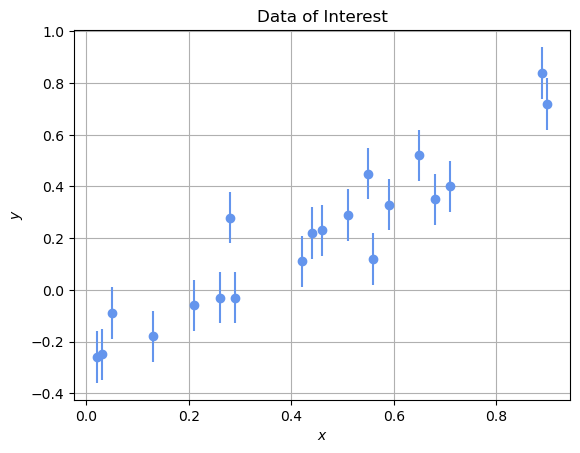

In [2]:
# Import the data and visualize it like a good physicist would.
data = np.loadtxt("model_selection.txt").transpose()
x,y, dy = data
plt.errorbar(x,y,yerr=dy, fmt='o',color='cornflowerblue',label='Dataset 1');
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.grid()
plt.title('Data of Interest');

Now, we proceed with part a.

In [3]:
#1a. Linear Bayesian model

# Likelihood using the linear model with a flat prior.
def likelihood(a,b):
    'Define the log-likelihood.'
    model = a + b * x
    return np.exp(-0.5 * np.sum(((y - model) / dy) ** 2))

# Flat prior is just the area of the prior
prior = 1/(4*4) 

# Integrate over both parameters of the likelihood, limited from -2 to 2.
pD_given_M1, _ = dblquad(likelihood, -2, 2, -2, 2)

# Prior is uniform so can be outside integral
pD_given_M1 = prior* pD_given_M1

# Need to normalize this with M2 to find the probability wrt both models. Done in part b below.

*b).* Now, we wish to consider a quadratic model $M_2$ defined by $y=a+bx+cx^2$. We do the same, and find $p(D|M_2)$, restricting all parameters to being between $-2$ and $2$.

In [4]:
# Redefine the likelihood function for quadratic.
def likelihood_quad(a,b,c):
    'Define the likelihood.'
    model = a + b * x + c*x**2
    return np.exp(-0.5 * np.sum(((y - model) / dy) ** 2))

# Consider a flat prior again, this time it is the volume in parameter space.
prior = 1/(4*4*4)

# Integrate over both parameters of the likelihood, limited from -2 to 2.
pD_given_M2, _ = tplquad(likelihood_quad, -2, 2, -2, 2,-2,2)

# Prior is again uniform so can be outside integral
pD_given_M2 = prior* pD_given_M2

# We must normalize that the sum of all models is 1.
normalization = pD_given_M1 + pD_given_M2
print(f'p(D | M1) = {pD_given_M1/normalization*100:0.5g} %')
print(f'p(D | M2) = {pD_given_M2/normalization*100:0.5g} %')

p(D | M1) = 75.405 %
p(D | M2) = 24.595 %


*c).* Now, we wish to find the Bayes factor $B_{12}$.

In [5]:
# Compute Bayes factor B_12 = p(D | M1) / p(D | M2)
B12 = pD_given_M1 / pD_given_M2
print("Bayes Factor B_12:", B12)

Bayes Factor B_12: 3.065893007471034


Since the Bayes factor is greater than 1, it means that the model $M_1$ is favored. We can see by parts a and b that this makes sense as the evidence for $M_1$ is actually *greater* than the evidence for $M_2$, which implies it is the more likely result.

### Problem 2 : Frequentist Model Selection and Wilks' Theorem

*We now consider the model selection as frequentists to determine if a linear or quadratic fit is better.*

---
*a). We first consider a model $M_1$ in which the data are described by a linear relationship $y=a+bx$. We minimize the $\chi^2$ test statistic and find $\chi^2_{M_1}$ as well as the best estimates $\hat{a},\hat{b}$. We plot it and also find the $p$-value*.

The $\chi^2_{M_1}$ test statistic is given to us as 
$$\chi^2_{M_1} = \sum_{i=1}^N \left(\frac{y_i - (a+bx_i)}{\sigma_i}\right)^2$$

Below in our code we solve for the best fits by using the weighted means of our variables

Best-fit parameters:
a_hat = -0.2630
b_hat = 1.0684
Chi-square (χ²_M1) = 20.8850
Degrees of freedom = 18
P-value = 0.2853


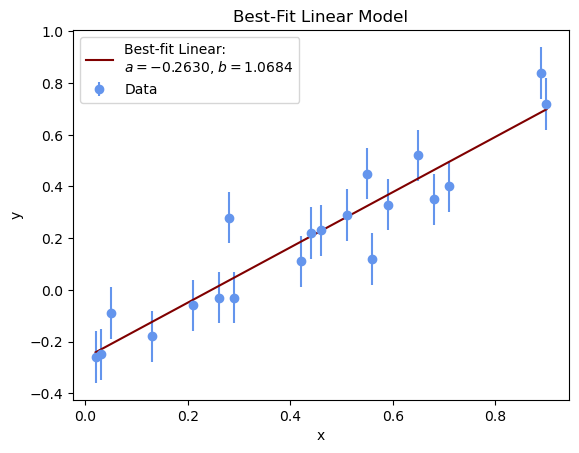

In [6]:
# 2a. Linear Model M1 (Frequentist)

# Weights for our variables
w = 1 / dy**2

# Weighted mean of x and y for computing best-fit parametrs.
x_bar = np.sum(w * x) / np.sum(w)
y_bar = np.sum(w * y) / np.sum(w)

# Best-fit of the parameter a and b.
b_hat = np.sum(w * (x - x_bar) * (y - y_bar)) / np.sum(w * (x - x_bar)**2)
a_hat = y_bar - b_hat * x_bar

# chi^2 sum as given in the problem, dy is our sigma.
chi2_M1 = np.sum(((y - (a_hat + b_hat * x)) / dy) ** 2)

# Using the hint that we can find the p value by an N-2 dof chi^2. 
dof = 20 - 2

# Used the chi2 cdf from scipy because I am a lazy individual.
p_value = 1 - chi2.cdf(chi2_M1, dof)

### ------------ Plotting and such
print(f"Best-fit parameters:")
print(f"a_hat = {a_hat:.4f}")
print(f"b_hat = {b_hat:.4f}")
print(f"Chi-square (χ²_M1) = {chi2_M1:.4f}")
print(f"Degrees of freedom = {dof}")
print(f"P-value = {p_value:.4f}")

plt.errorbar(x, y, yerr=dy, fmt='o', label='Data', color='cornflowerblue')
plt.plot(x, a_hat + b_hat*x, label=f'Best-fit Linear: \n$a={a_hat:.4f}$, $b={b_hat:.4f}$', color='maroon')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Best-Fit Linear Model')
plt.legend();

This seems like a pretty decent fit, but the $p$-value is not statistically significant. If we check this with a built in linear regression, we get the same parameters and $p$-value (albeit, it's probably being solved exactly the same way lol, but a decent-ish sanity check).

*b). Now, we wish to do the same for a quadratic model.*

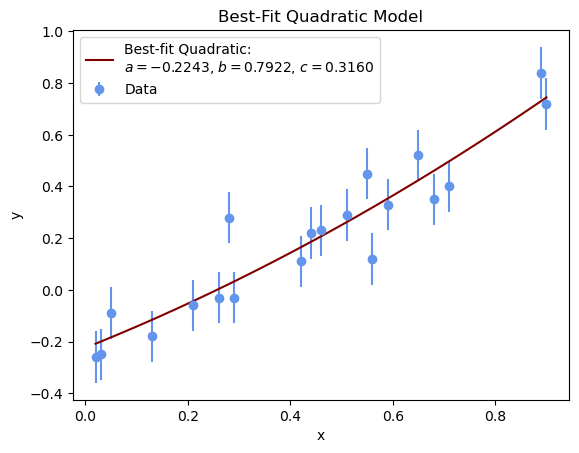

Best-fit parameters:
a_hat = -0.2243
b_hat = 0.7922
c_hat = 0.3160
Chi-square (χ²_M2) = 19.8848
Degrees of freedom = 17
P-value = 0.2802


In [7]:
# 2b. Quadratic Model M2 (Frequentist)

# Had the idea from my undergrad linear algebra textbook to minimize this as Mx = b instead of hand-solving 3 equations. I think it is pretty neat!

# Compute sums for normal equations
S_w = np.sum(w)
S_x = np.sum(w * x)
S_x2 = np.sum(w * x**2)
S_x3 = np.sum(w * x**3)
S_x4 = np.sum(w * x**4)
S_y = np.sum(w * y)
S_xy = np.sum(w * x * y)
S_x2y = np.sum(w * x**2 * y)

# Construct the matrix M
M = np.array([
    [S_w,  S_x,  S_x2],
    [S_x,  S_x2, S_x3],
    [S_x2, S_x3, S_x4]
])

# Construct b
b_vec = np.array([S_y, S_xy, S_x2y])

# Solve for best-fit parameters with Mx = b
a_hat, b_hat, c_hat = np.linalg.solve(M, b_vec)

# Compute chi2 of M2
chi2_M2 = np.sum(((y - (a_hat + b_hat * x + c_hat * x**2)) / dy) ** 2)

# Doing as in part a, comparing to chi2 with N-3 DoF.
dof = 20 - 3
p_value_M2 = 1 - chi2.cdf(chi2_M2, dof)



### ------------ Plotting and such
plt.errorbar(x, y, yerr=dy, fmt='o', label='Data', color='cornflowerblue')
x_fit = np.linspace(min(x), max(x), 1000)
y_fit = a_hat + b_hat * x_fit + c_hat * x_fit**2
plt.plot(x_fit, y_fit, label=f'Best-fit Quadratic: \n$a={a_hat:.4f}$, $b={b_hat:.4f}$, $c={c_hat:.4f}$', color='maroon')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Best-Fit Quadratic Model')
plt.legend()
plt.show()

print(f"Best-fit parameters:")
print(f"a_hat = {a_hat:.4f}")
print(f"b_hat = {b_hat:.4f}")
print(f"c_hat = {c_hat:.4f}")
print(f"Chi-square (χ²_M2) = {chi2_M2:.4f}")
print(f"Degrees of freedom = {dof}")
print(f"P-value = {p_value_M2:.4f}")


Again, not a statistically significant p-value.

*c).* Now we compare the models.

In [8]:
# 1c. Comparison of Models

# Compute the chi-square difference
delta_chi2 = chi2_M1 - chi2_M2

# Compute p-value from chi-square distribution with 1 degree of freedom, as we have 3-2 = 1
p_value_delta_chi2 = 1 - chi2.cdf(delta_chi2, 1)

print(f"Chi-square for M1 (linear model): {chi2_M1:.4f}")
print(f"Chi-square for M2 (quadratic model): {chi2_M2:.4f}")
print(f"Chi-square difference (∆χ²): {delta_chi2:.4f}")
print(f"P-value for ∆χ²: {p_value_delta_chi2:.4f}")


Chi-square for M1 (linear model): 20.8850
Chi-square for M2 (quadratic model): 19.8848
Chi-square difference (∆χ²): 1.0003
P-value for ∆χ²: 0.3172


This is not a statistically significant result, as the difference in $\Delta \chi^2$ is small and the $p$-value is not significant. The models vary by a $\Delta \chi^2$ of almost exactly 1, which is simply due to the fact that the quadratic model has one additional DoF. A pitfall of such approaches is overfitting; of course we will get a "better" model if we increase parameters. Had we fit with a degree 20 polynomial, our $\chi^2$ value would be zero. It would be "perfect," but it would _not_ be a predictive model!